##  Assignment 2 codes for bejing subway lines and graph
# first time using the jupyter note book

## inclass priactice

In [66]:
import networkx as nx

In [105]:
subway_graph = nx.Graph()

In [106]:
subway_graph.add_nodes_from(list(position.keys()))

In [107]:
%matplotlib inline

In [108]:
import matplotlib

In [109]:
import matplotlib.pyplot as plt

In [110]:
from IPython.core.pylabtools import figsize

In [111]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

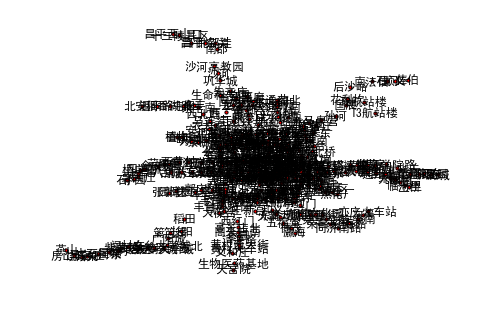

In [112]:
nx.draw(subway_graph, position, with_labels= True, node_size=10)

In [113]:
subway_with_route = nx.Graph(subway_connection)

beautifulsoup practice 
get the connections between the stations

In [20]:
nx.draw(subway_with_route, position, with_labels=True, node_size=30)
# 站点信息与线路信息不匹配，map的地址未更新

NameError: name 'nx' is not defined

从高德地图爬取站点坐标，线路，站点链接

In [4]:
import requests

In [5]:
from bs4 import BeautifulSoup

In [6]:
import json

In [7]:
selfurl = 'http://map.amap.com/subway/index.html?&1100'
responses = requests.get(selfurl)
data = responses.text
data = data.encode('utf-8')

In [8]:
#data

In [9]:
newsoup = BeautifulSoup(data, 'lxml')

In [10]:
url = 'http://map.amap.com/service/subway?_1555502190153&srhdata=1100_drw_beijing.json'
response = requests.get(url)
html = response.text
result = json.loads(html)

In [11]:
#result['l']  地铁站信息

In [12]:
#result['l'][0] 线路信息

In [13]:
position = {}
lines = {}
for node in result['l']:
    lines[node['kn']] = []
    for start in node['st']:
        long, lat = start['sl'].split(',')
        long, lat = float(long), float(lat)
        position[start['n']] = (long, lat)
        lines[node['kn']].append(start['n'])

        

In [14]:
#position

In [43]:
trans_station = {}
for key, values in lines.items():
    for v in values:
        if v not in trans_station:
            trans_station[v] = [key] 
    
        else:
            trans_station[v].append(key)
            


In [57]:
#lines

In [58]:
#trans_station

In [18]:
from collections import defaultdict

In [59]:
subway_connection = defaultdict(list,
            {'七里庄': ['六里桥', '丰台东大街', '大井', '西局'],
             '万寿路': ['五棵松', '公主坟'],
             '万源街': ['亦庄文化园', '荣京东街'],
             '三元桥': ['太阳宫', '亮马桥', '东直门', '航站楼'],
             '上地': ['五道口', '西二旗'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '东四': ['张自忠路', '灯市口', '南锣鼓巷', '朝阳门'],
             '东四十条': ['朝阳门', '东直门'],
             '东夏园': ['郝家府', '潞城'],
             '东大桥': ['朝阳门', '呼家楼'],
             '东湖渠': ['望京', '来广营'],
             '东直门': ['东四十条', '雍和宫', '柳芳', '三元桥'],
             '东风北桥': ['枣营', '将台'],
             '中关村': ['北京大学东门', '海淀黄庄'],
             '丰台东大街': ['七里庄', '丰台南路'],
             '丰台南路': ['丰台东大街', '科怡路'],
             '丰台科技园': ['科怡路', '郭公庄'],
             '丰台站': ['首经贸', '泥洼'],
             '临河里': ['梨园', '土桥'],
             '义和庄': ['黄村火车站', '生物医药基地'],
             '九棵树': ['果园', '梨园'],
             '九龙山': ['双井', '大郊亭', '平乐园', '大望路'],
             '五棵松': ['玉泉路', '万寿路'],
             '五道口': ['知春路', '上地'],
             '亦庄文化园': ['亦庄桥', '万源街'],
             '亦庄桥': ['旧宫', '亦庄文化园'],
             '亮马桥': ['三元桥', '农业展览馆'],
             '人民大学': ['海淀黄庄', '魏公村'],
             '什刹海': ['鼓楼大街', '南锣鼓巷'],
             '传媒大学': ['高碑店', '双桥'],
             '俸伯': ['顺义'],
             '健德门': ['牡丹园', '北土城'],
             '光熙门': ['芍药居', '柳芳'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '八角游乐园': ['古城', '八宝山'],
             '八里桥': ['管庄', '通州北苑'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '公益西桥': ['角门西', '新宫'],
             '六道口': ['清华东路西口', '北沙滩'],
             '六里桥': ['六里桥东', '七里庄', '西局', '莲花桥'],
             '六里桥东': ['北京西站', '六里桥'],
             '关庄': ['大屯路东', '望京西'],
             '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'],
             '农业展览馆': ['亮马桥', '团结湖'],
             '分钟寺': ['十里河', '成寿寺'],
             '刘家窑': ['蒲黄榆', '宋家庄'],
             '前门': ['和平门', '崇文门'],
             '动物园': ['国家图书馆', '西直门'],
             '劲松': ['双井', '潘家园'],
             '化工': ['百子湾', '南楼梓庄'],
             '北京南站': ['陶然亭', '马家堡', '陶然桥'],
             '北京大学东门': ['圆明园', '中关村'],
             '北京站': ['崇文门', '建国门'],
             '北京西站': ['湾子', '军事博物馆', '六里桥东'],
             '北土城': ['奥体中心', '安华桥', '健德门', '安贞门'],
             '北宫门': ['安河桥北', '西苑'],
             '北工大西门': ['南八里庄', '平乐园'],
             '北新桥': ['雍和宫', '张自忠路'],
             '北沙滩': ['六道口', '奥林匹克公园'],
             '北海北': ['平安里', '南锣鼓巷'],
             '北苑': ['立水桥', '望京西'],
             '北苑路北': ['立水桥南', '大屯路东'],
             '北运河东': ['北运河西', '郝家府'],
             '北运河西': ['通运门', '北运河东'],
             '北邵洼': ['昌平东关', '南邵'],
             '十三陵景区': ['昌平西山口', '昌平'],
             '十里堡': ['金台路', '青年路'],
             '十里河': ['潘家园', '分钟寺', '方庄', '南八里庄'],
             '南八里庄': ['十里河', '北工大西门'],
             '南楼梓庄': ['化工', '欢乐谷景区'],
             '南法信': ['后沙峪', '石门'],
             '南礼士路': ['木樨地', '复兴门'],
             '南邵': ['北邵洼', '沙河高教园'],
             '南锣鼓巷': ['北海北', '东四', '什刹海'],
             '双井': ['广渠门外', '九龙山', '国贸', '劲松'],
             '双合': ['垡头', '焦化厂'],
             '双桥': ['传媒大学', '管庄'],
             '古城': ['苹果园', '八角游乐园'],
             '同济南路': ['荣昌东街', '经海路'],
             '后沙峪': ['花梨坎', '南法信'],
             '呼家楼': ['东大桥', '金台路', '团结湖', '金台夕照'],
             '和平西桥': ['惠新西街南口', '和平里北街'],
             '和平里北街': ['和平西桥', '雍和宫'],
             '和平门': ['宣武门', '前门'],
             '善各庄': ['来广营'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '回龙观': ['龙泽', '霍营'],
             '回龙观东大街': ['平西府', '霍营'],
             '团结湖': ['农业展览馆', '呼家楼'],
             '园博园': ['张郭庄', '大瓦窑'],
             '国家图书馆': ['魏公村', '动物园', '白石桥南'],
             '国展': ['孙河', '花梨坎'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '圆明园': ['西苑', '北京大学东门'],
             '土桥': ['临河里'],
             '垡头': ['欢乐谷景区', '双合'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '大井': ['郭庄子', '七里庄'],
             '大屯路东': ['北苑路北', '惠新西街北口', '安立路', '关庄'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '大瓦窑': ['园博园', '郭庄子'],
             '大红门': ['石榴庄', '角门东'],
             '大葆台': ['郭公庄', '稻田'],
             '大郊亭': ['九龙山', '百子湾'],
             '大钟寺': ['西直门', '知春路'],
             '天坛东门': ['磁器口', '蒲黄榆'],
             '天安门东': ['天安门西', '王府井'],
             '天安门西': ['西单', '天安门东'],
             '天宫院': ['生物医药基地'],
             '天通苑': ['天通苑北', '天通苑南'],
             '天通苑北': ['天通苑'],
             '天通苑南': ['天通苑', '立水桥'],
             '太阳宫': ['芍药居', '三元桥'],
             '奥体中心': ['奥林匹克公园', '北土城'],
             '奥林匹克公园': ['森林公园南门', '奥体中心', '北沙滩', '安立路'],
             '孙河': ['马泉营', '国展'],
             '安华桥': ['北土城', '安德里北街'],
             '安定门': ['雍和宫', '鼓楼大街'],
             '安德里北街': ['安华桥', '鼓楼大街'],
             '安河桥北': ['北宫门'],
             '安立路': ['奥林匹克公园', '大屯路东'],
             '安贞门': ['北土城', '惠新西街南口'],
             '宋家庄': ['刘家窑', '成寿寺', '石榴庄', '肖村'],
             '宣武门': ['长椿街', '和平门', '西单', '菜市口'],
             '将台': ['东风北桥', '高家园'],
             '小红门': ['肖村', '旧宫'],
             '崇文门': ['前门', '北京站', '东单', '磁器口'],
             '崔各庄': ['望京东', '马泉营'],
             '巩华城': ['沙河', '朱辛庄'],
             '巴沟': ['苏州街', '火器营'],
             '常营': ['黄渠', '草房'],
             '平乐园': ['北工大西门', '九龙山'],
             '平安里': ['新街口', '西四', '车公庄', '北海北'],
             '平西府': ['育知路', '回龙观东大街'],
             '广安门内': ['达官营', '菜市口'],
             '广渠门内': ['磁器口', '广渠门外'],
             '广渠门外': ['广渠门内', '双井'],
             '广阳城': ['篱笆房', '良乡大学城北'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '张自忠路': ['北新桥', '东四'],
             '张郭庄': ['园博园'],
             '惠新西街北口': ['大屯路东', '惠新西街南口'],
             '惠新西街南口': ['惠新西街北口', '和平西桥', '安贞门', '芍药居'],
             '慈寿寺': ['海淀五路居', '花园桥', '西钓鱼台', '车道沟'],
             '成寿寺': ['分钟寺', '宋家庄'],
             '新宫': ['公益西桥', '西红门'],
             '新街口': ['西直门', '平安里'],
             '方庄': ['蒲黄榆', '十里河'],
             '旧宫': ['小红门', '亦庄桥'],
             '昌平': ['十三陵景区', '昌平东关'],
             '昌平东关': ['昌平', '北邵洼'],
             '昌平西山口': ['十三陵景区'],
             '景泰': ['永定门外', '蒲黄榆'],
             '望京': ['阜通', '东湖渠', '望京西', '望京东'],
             '望京东': ['望京', '崔各庄'],
             '望京南': ['高家园', '阜通'],
             '望京西': ['北苑', '芍药居', '关庄', '望京'],
             '朝阳公园': ['金台路', '枣营'],
             '朝阳门': ['建国门', '东四十条', '东四', '东大桥'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '朱辛庄': ['育知路', '巩华城', '生命科学园'],
             '来广营': ['东湖渠', '善各庄'],
             '林萃桥': ['永泰庄', '森林公园南门'],
             '果园': ['通州北苑', '九棵树'],
             '枣园': ['高米店南', '清源路'],
             '枣营': ['朝阳公园', '东风北桥'],
             '柳芳': ['光熙门', '东直门'],
             '桥湾': ['珠市口', '磁器口'],
             '梨园': ['九棵树', '临河里'],
             '森林公园南门': ['林萃桥', '奥林匹克公园'],
             '次渠': ['次渠南'],
             '次渠南': ['经海路', '次渠'],
             '欢乐谷景区': ['南楼梓庄', '垡头'],
             '永安里': ['建国门', '国贸'],
             '永定门外': ['陶然桥', '景泰'],
             '永泰庄': ['西小口', '林萃桥'],
             '沙河': ['沙河高教园', '巩华城'],
             '沙河高教园': ['南邵', '沙河'],
             '泥洼': ['丰台站', '西局'],
             '海淀五路居': ['慈寿寺'],
             '海淀黄庄': ['中关村', '人民大学', '苏州街', '知春里'],
             '清华东路西口': ['六道口'],
             '清源路': ['枣园', '黄村西大街'],
             '湾子': ['北京西站', '达官营'],
             '潘家园': ['劲松', '十里河'],
             '潞城': ['东夏园'],
             '火器营': ['长春桥', '巴沟'],
             '灯市口': ['东四', '东单'],
             '灵境胡同': ['西四', '西单'],
             '焦化厂': ['双合'],
             '牡丹园': ['西土城', '健德门'],
             '物资学院路': ['草房', '通州北关'],
             '玉泉路': ['八宝山', '五棵松'],
             '王府井': ['天安门东', '东单'],
             '珠市口': ['虎坊桥', '桥湾'],
             '生命科学园': ['朱辛庄', '西二旗'],
             '生物医药基地': ['义和庄', '天宫院'],
             '白堆子': ['白石桥南', '军事博物馆'],
             '白石桥南': ['花园桥', '车公庄西', '国家图书馆', '白堆子'],
             '百子湾': ['大郊亭', '化工'],
             '知春路': ['知春里', '西土城', '大钟寺', '五道口'],
             '知春里': ['海淀黄庄', '知春路'],
             '石榴庄': ['宋家庄', '大红门'],
             '石门': ['南法信', '顺义'],
             '磁器口': ['崇文门', '天坛东门', '桥湾', '广渠门内'],
             '科怡路': ['丰台南路', '丰台科技园'],
             '积水潭': ['鼓楼大街', '西直门'],
             '稻田': ['大葆台', '长阳'],
             '立水桥': ['天通苑南', '立水桥南', '霍营', '北苑'],
             '立水桥南': ['立水桥', '北苑路北'],
             '管庄': ['双桥', '八里桥'],
             '篱笆房': ['长阳', '广阳城'],
             '红庙': ['大望路', '金台路'],
             '纪家庙': ['草桥', '首经贸'],
             '经海路': ['同济南路', '次渠南'],
             '肖村': ['宋家庄', '小红门'],
             '育新': ['霍营', '西小口'],
             '育知路': ['朱辛庄', '平西府'],
             '航站楼': ['三元桥'],
             '良乡南关': ['良乡大学城西', '苏庄'],
             '良乡大学城': ['良乡大学城北', '良乡大学城西'],
             '良乡大学城北': ['广阳城', '良乡大学城'],
             '良乡大学城西': ['良乡大学城', '良乡南关'],
             '芍药居': ['惠新西街南口', '太阳宫', '望京西', '光熙门'],
             '花园桥': ['慈寿寺', '白石桥南'],
             '花梨坎': ['国展', '后沙峪'],
             '苏州街': ['巴沟', '海淀黄庄'],
             '苏庄': ['良乡南关'],
             '苹果园': ['古城'],
             '草房': ['常营', '物资学院路'],
             '草桥': ['角门西', '纪家庙'],
             '荣京东街': ['万源街', '荣昌东街'],
             '荣昌东街': ['荣京东街', '同济南路'],
             '莲花桥': ['六里桥', '公主坟'],
             '菜市口': ['宣武门', '陶然亭', '广安门内', '虎坊桥'],
             '蒲黄榆': ['天坛东门', '刘家窑', '景泰', '方庄'],
             '虎坊桥': ['菜市口', '珠市口'],
             '褡裢坡': ['青年路', '黄渠'],
             '西二旗': ['上地', '龙泽', '生命科学园'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '西四': ['平安里', '灵境胡同'],
             '西土城': ['知春路', '牡丹园'],
             '西小口': ['育新', '永泰庄'],
             '西局': ['泥洼', '六里桥', '七里庄'],
             '西直门': ['车公庄', '积水潭', '动物园', '新街口', '大钟寺'],
             '西红门': ['新宫', '高米店北'],
             '西苑': ['北宫门', '圆明园'],
             '西钓鱼台': ['公主坟', '慈寿寺'],
             '角门东': ['大红门', '角门西'],
             '角门西': ['马家堡', '公益西桥', '角门东', '草桥'],
             '车公庄': ['西直门', '阜成门', '车公庄西', '平安里'],
             '车公庄西': ['白石桥南', '车公庄'],
             '车道沟': ['慈寿寺', '长春桥'],
             '达官营': ['湾子', '广安门内'],
             '通州北关': ['物资学院路', '通运门'],
             '通州北苑': ['八里桥', '果园'],
             '通运门': ['通州北关', '北运河西'],
             '郝家府': ['北运河东', '东夏园'],
             '郭公庄': ['丰台科技园', '大葆台'],
             '郭庄子': ['大瓦窑', '大井'],
             '金台夕照': ['呼家楼', '国贸'],
             '金台路': ['呼家楼', '十里堡', '红庙', '朝阳公园'],
             '长春桥': ['车道沟', '火器营'],
             '长椿街': ['复兴门', '宣武门'],
             '长阳': ['稻田', '篱笆房'],
             '阜成门': ['车公庄', '复兴门'],
             '阜通': ['望京南', '望京'],
             '陶然亭': ['菜市口', '北京南站'],
             '陶然桥': ['北京南站', '永定门外'],
             '雍和宫': ['东直门', '安定门', '和平里北街', '北新桥'],
             '霍营': ['回龙观东大街', '育新', '回龙观', '立水桥'],
             '青年路': ['十里堡', '褡裢坡'],
             '顺义': ['石门', '俸伯'],
             '首经贸': ['纪家庙', '丰台站'],
             '马家堡': ['北京南站', '角门西'],
             '马泉营': ['崔各庄', '孙河'],
             '高家园': ['将台', '望京南'],
             '高碑店': ['四惠东', '传媒大学'],
             '高米店北': ['西红门', '高米店南'],
             '高米店南': ['高米店北', '枣园'],
             '魏公村': ['人民大学', '国家图书馆'],
             '黄村火车站': ['黄村西大街', '义和庄'],
             '黄村西大街': ['清源路', '黄村火车站'],
             '黄渠': ['褡裢坡', '常营'],
             '鼓楼大街': ['安定门', '积水潭', '安德里北街', '什刹海'],
             '龙泽': ['西二旗', '回龙观']})

# subway search route search methods

In [60]:
def get_route(start, destination, connections, sort_candidats):
    routes = [[start]]
    visited = set()
    
    while routes:
        route = routes.pop()
        frontier = route[-1]
        
        if frontier in visited: continue
        successors = connections[frontier]
        for station in successors:
            if station in route: continue
            new_route = route + [station]
            routes.append(new_route)
            if station == destination:
                return new_route
        visited.add(frontier)
        routes = sort_candidats(routes)
        
def sortting(paths):
    return sorted(paths, key=len)



    


In [61]:
print(get_route('奥体中心', '天安门东', subway_connection, sortting))

['奥体中心', '北土城', '安贞门', '惠新西街南口', '芍药居', '光熙门', '柳芳', '东直门', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台夕照', '国贸', '双井', '劲松', '潘家园', '十里河', '南八里庄', '北工大西门', '平乐园', '九龙山', '大望路', '红庙', '金台路', '朝阳公园', '枣营', '东风北桥', '将台', '高家园', '望京南', '阜通', '望京', '望京西', '关庄', '大屯路东', '安立路', '奥林匹克公园', '森林公园南门', '林萃桥', '永泰庄', '西小口', '育新', '霍营', '回龙观', '龙泽', '西二旗', '上地', '五道口', '知春路', '大钟寺', '西直门', '新街口', '平安里', '北海北', '南锣鼓巷', '什刹海', '鼓楼大街', '安定门', '雍和宫', '北新桥', '张自忠路', '东四', '朝阳门', '建国门', '北京站', '崇文门', '磁器口', '桥湾', '珠市口', '虎坊桥', '菜市口', '广安门内', '达官营', '湾子', '北京西站', '六里桥东', '六里桥', '莲花桥', '公主坟', '西钓鱼台', '慈寿寺', '车道沟', '长春桥', '火器营', '巴沟', '苏州街', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '白石桥南', '白堆子', '军事博物馆', '木樨地', '南礼士路', '复兴门', '长椿街', '宣武门', '西单', '天安门西', '天安门东']
